# Linear Regression Regularisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Data reading and examination

In [2]:
car=pd.read_csv('E:/DSS/gilthub projects/11-knn and LR/car_data.csv')
car

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
car.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
car.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [7]:
car.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_name'], dtype='object')

In [8]:
car.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Conversion of hp(object) to numeric

In [9]:
car.hp = pd.to_numeric(car.hp, errors='coerce').fillna(0, downcast='infer')
car.dtypes

mpg         float64
cyl           int64
disp        float64
hp            int64
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [10]:
# Verification of null values
car.isnull().sum()
# No null values in the data

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

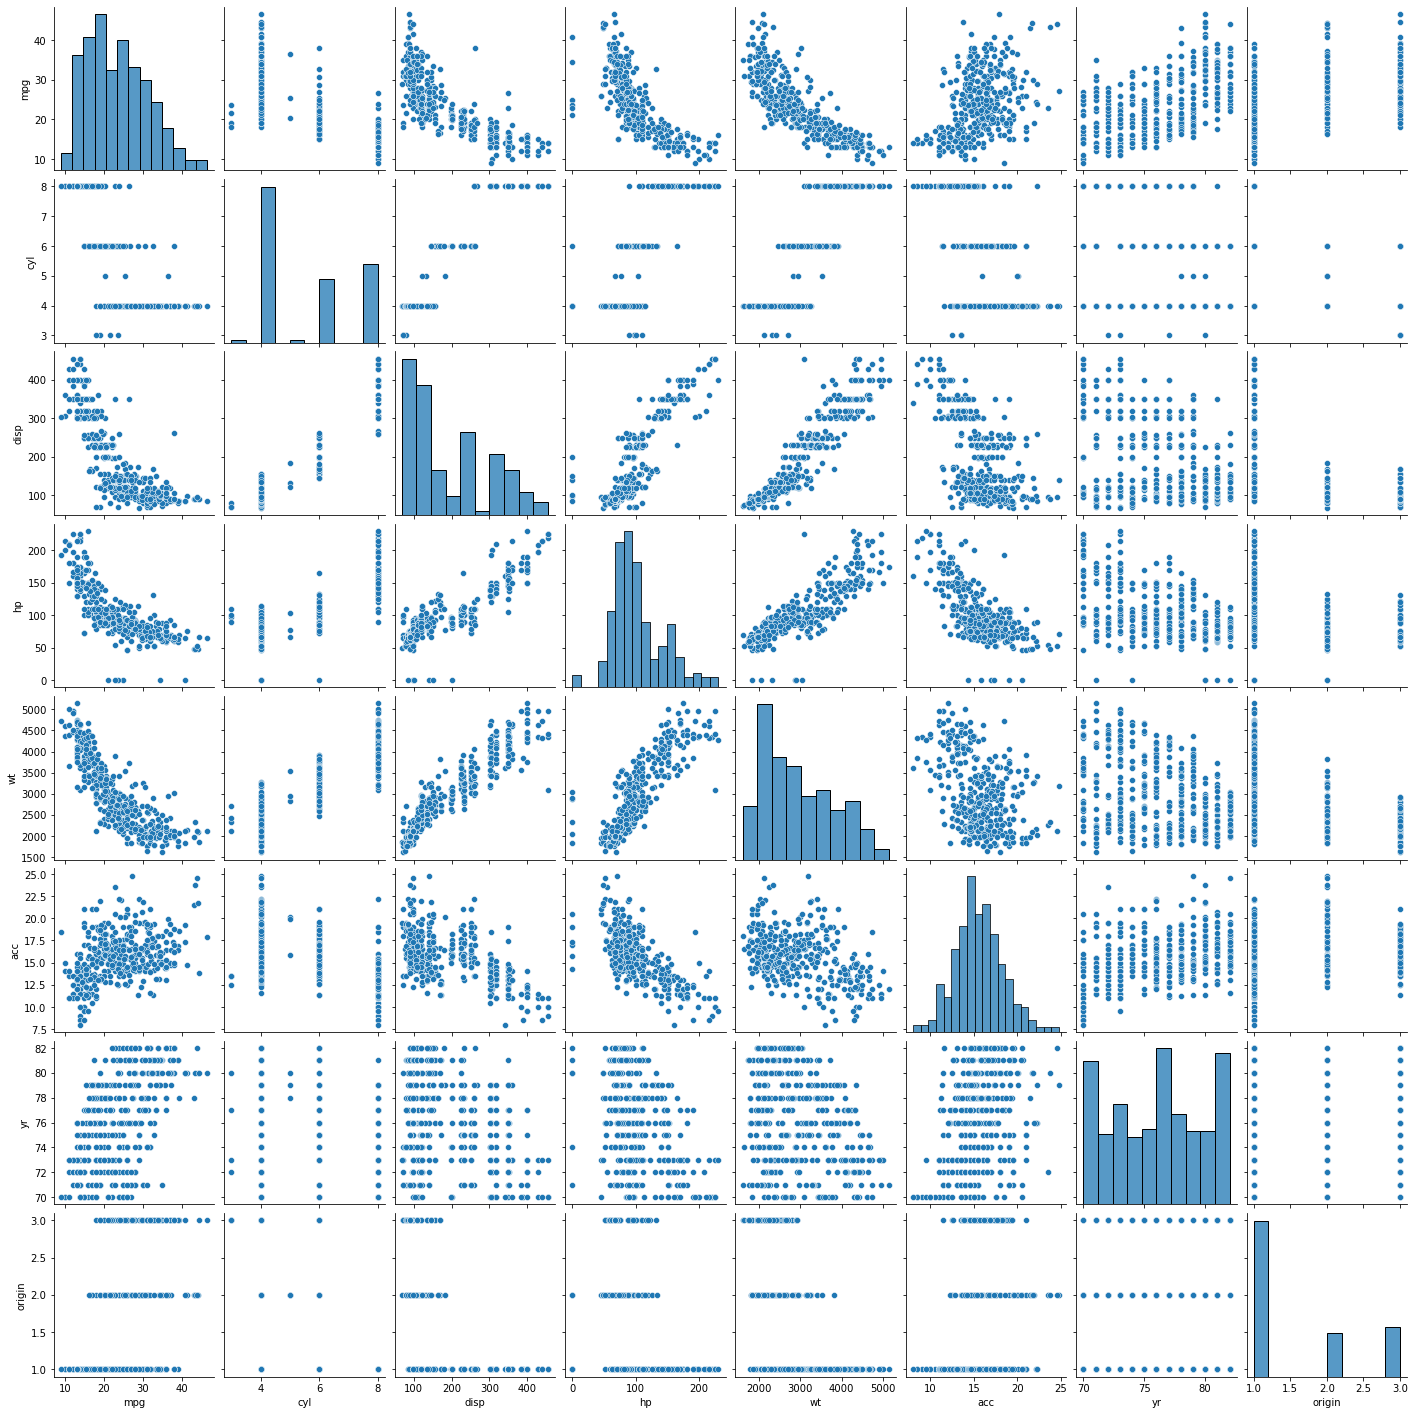

In [11]:
sb.pairplot(car)
plt.show()

In [12]:
car["car_name"].value_counts()


ford pinto                 6
toyota corolla             5
amc matador                5
ford maverick              5
chevrolet chevette         4
                          ..
plymouth valiant custom    1
mercury grand marquis      1
datsun 810 maxima          1
chevy c10                  1
peugeot 304                1
Name: car_name, Length: 305, dtype: int64

In [13]:
car_names=car["car_name"].apply(lambda x: x.split(" ")[0])
car_names

0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
393         ford
394           vw
395        dodge
396         ford
397        chevy
Name: car_name, Length: 398, dtype: object

In [14]:
car_names.value_counts()

ford             51
chevrolet        43
plymouth         31
dodge            28
amc              28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
volvo             6
chrysler          6
vw                6
renault           5
subaru            4
saab              4
opel              4
chevy             3
cadillac          2
mercedes-benz     2
maxda             2
bmw               2
mercedes          1
capri             1
chevroelt         1
nissan            1
vokswagen         1
triumph           1
toyouta           1
hi                1
Name: car_name, dtype: int64

In [15]:
#vokswagen---volkswagen, vw 
#toyota---toyouta 
#mercedes-benz-mercedes
car["Company"]=car_names
car

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,Company
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,ford
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,vw
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,dodge
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,ford


In [16]:
car.loc[(car["Company"]=="vokswagen"), "Company"]="volkswagen"
car.loc[(car["Company"]=="vw"), "Company"]="volkswagen"
car.loc[(car["Company"]=="toyouta"), "Company"]="toyota"
car.loc[(car["Company"]=="mercedes-benz"), "Company"]="mercedes"

In [17]:
car["Company"].value_counts()

ford          51
chevrolet     43
plymouth      31
dodge         28
amc           28
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
honda         13
mercury       11
mazda         10
oldsmobile    10
fiat           8
peugeot        8
audi           7
volvo          6
chrysler       6
renault        5
saab           4
opel           4
subaru         4
chevy          3
mercedes       3
maxda          2
cadillac       2
bmw            2
chevroelt      1
triumph        1
nissan         1
capri          1
hi             1
Name: Company, dtype: int64

In [18]:
#car_comp=car.drop("car_name",axis=1)
#car_comp

In [19]:
#car_comp

# Inferences from the above graphs:
# 1) Acceleration(acc) is following Normal distribution.
# 2) Disp and WT have linear relationship.
# 3) mpg and disp are negatively correlated.
# 4) hp,disp and acc are linearly related.

In [20]:
#Performing one-hot encoding to convert catagorical data into numerical data
car_en = pd.get_dummies(car,drop_first =True,columns=['yr','origin','Company'])
car_en

,mpg,cyl,disp,hp,wt,acc,car_name,yr_71,yr_72,yr_73,...,Company_peugeot,Company_plymouth,Company_pontiac,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_triumph,Company_volkswagen,Company_volvo
0,18.0,8,307.0,130,3504,12.0,chevrolet chevelle malibu,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165,3693,11.5,buick skylark 320,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150,3436,11.0,plymouth satellite,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150,3433,12.0,amc rebel sst,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140,3449,10.5,ford torino,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,ford mustang gl,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52,2130,24.6,vw pickup,0,0,0,...,0,0,0,0,0,0,0,0,1,0
395,32.0,4,135.0,84,2295,11.6,dodge rampage,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79,2625,18.6,ford ranger,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
car_en.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'car_name', 'yr_71', 'yr_72',
       'yr_73', 'yr_74', 'yr_75', 'yr_76', 'yr_77', 'yr_78', 'yr_79', 'yr_80',
       'yr_81', 'yr_82', 'origin_2', 'origin_3', 'Company_audi', 'Company_bmw',
       'Company_buick', 'Company_cadillac', 'Company_capri',
       'Company_chevroelt', 'Company_chevrolet', 'Company_chevy',
       'Company_chrysler', 'Company_datsun', 'Company_dodge', 'Company_fiat',
       'Company_ford', 'Company_hi', 'Company_honda', 'Company_maxda',
       'Company_mazda', 'Company_mercedes', 'Company_mercury',
       'Company_nissan', 'Company_oldsmobile', 'Company_opel',
       'Company_peugeot', 'Company_plymouth', 'Company_pontiac',
       'Company_renault', 'Company_saab', 'Company_subaru', 'Company_toyota',
       'Company_triumph', 'Company_volkswagen', 'Company_volvo'],
      dtype='object')

In [22]:
car_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mpg                 398 non-null    float64
 1   cyl                 398 non-null    int64  
 2   disp                398 non-null    float64
 3   hp                  398 non-null    int64  
 4   wt                  398 non-null    int64  
 5   acc                 398 non-null    float64
 6   car_name            398 non-null    object 
 7   yr_71               398 non-null    uint8  
 8   yr_72               398 non-null    uint8  
 9   yr_73               398 non-null    uint8  
 10  yr_74               398 non-null    uint8  
 11  yr_75               398 non-null    uint8  
 12  yr_76               398 non-null    uint8  
 13  yr_77               398 non-null    uint8  
 14  yr_78               398 non-null    uint8  
 15  yr_79               398 non-null    uint8  
 16  yr_80   

In [23]:
car_en.dtypes

mpg                   float64
cyl                     int64
disp                  float64
hp                      int64
wt                      int64
acc                   float64
car_name               object
yr_71                   uint8
yr_72                   uint8
yr_73                   uint8
yr_74                   uint8
yr_75                   uint8
yr_76                   uint8
yr_77                   uint8
yr_78                   uint8
yr_79                   uint8
yr_80                   uint8
yr_81                   uint8
yr_82                   uint8
origin_2                uint8
origin_3                uint8
Company_audi            uint8
Company_bmw             uint8
Company_buick           uint8
Company_cadillac        uint8
Company_capri           uint8
Company_chevroelt       uint8
Company_chevrolet       uint8
Company_chevy           uint8
Company_chrysler        uint8
Company_datsun          uint8
Company_dodge           uint8
Company_fiat            uint8
Company_fo

# Building model for linear regression

In [24]:
# decleration of x and y variables
x = car_en.drop(['mpg','car_name'],axis = 1)
y = car_en['mpg']

In [25]:
x

,cyl,disp,hp,wt,acc,yr_71,yr_72,yr_73,yr_74,yr_75,...,Company_peugeot,Company_plymouth,Company_pontiac,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_triumph,Company_volkswagen,Company_volvo
0,8,307.0,130,3504,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,350.0,165,3693,11.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,318.0,150,3436,11.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,8,304.0,150,3433,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,302.0,140,3449,10.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,4,97.0,52,2130,24.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
395,4,135.0,84,2295,11.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,4,120.0,79,2625,18.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

# Assumptions for linear regression
# 1) Linearity between each dependent variable and independent variable    
# 2) No auto correlation   
# 3) Normality of residuals   
# 4) No multi-colinearity  
# 5) No heteroscedasticity

In [27]:
import statsmodels.api as sm
X_constant = sm.add_constant(x)
model = sm.OLS(y,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     47.87
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.58e-126
Time:                        14:51:38   Log-Likelihood:                -975.36
No. Observations:                 398   AIC:                             2051.
Df Residuals:                     348   BIC:                             2250.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 33.9904      2.144     15.852      0.000      29.773      38.208
cyl                   -0.2009      0.320     -0.628      0.530      -0.830       0.428
disp                   0.0148      0.008      1.867      0.063      -0.001       0.030
hp                    -0.0114      0.011     -1.001      0.317      -0.034       0.011
wt                    -0.0062      0.001     -9.068      0.000      -0.008      -0.005
acc                    0.1098      0.089      1.229      0.220      -0.066       0.286
yr_71                  1.0224      0.874      1.170      0.243      -0.696       2.740
yr_72                  0.0583      0.881      0.066      0.947      -1.675       1.791
yr_73                 -0.4227      0.794     -0.533      0.595      -1.984       1.138
yr_74                  1.6412      0.936      1.754      0.080      -0.199       3.482
yr_75                  1.1099      0.896      1.238      0.216      -0.653       2.873
yr_76                  1.7070      0.874      1.953      0.052      -0.012       3.426
yr_77                  3.0502      0.907      3.364      0.001       1.267       4.833
yr_78                  2.9929      0.853      3.510      0.001       1.316       4.670
yr_79                  5.3141      0.906      5.867      0.000       3.533       7.095
yr_80                  9.2764      0.961      9.651      0.000       7.386      11.167
yr_81                  6.9077      0.933      7.404      0.000       5.073       8.743
yr_82                  8.3187      0.941      8.840      0.000       6.468      10.170
origin_2               3.6222      0.779      4.649      0.000       2.090       5.155
origin_3               3.3306      0.808      4.124      0.000       1.742       4.919
Company_audi          -0.0214      1.141     -0.019      0.985      -2.265       2.222
Company_bmw           -1.5108      2.040     -0.741      0.459      -5.523       2.501
Company_buick          1.6025      0.960      1.670      0.096      -0.285       3.490
Company_cadillac       4.4608      2.251      1.982      0.048       0.034       8.888
Company_capri          3.3899      3.123      1.086      0.278      -2.752       9.531
Company_chevroelt      1.7279      3.123      0.553      0.580      -4.414       7.870
Company_chevrolet      1.4882      0.738      2.018      0.044       0.037       2.939
Company_chevy          1.1450      1.882      0.608      0.543      -2.557       4.847
Company_chrysler       0.4687      1.415      0.331      0.741      -2.315       3.252
Company_datsun         2.0710      0.781      2.651      0.008       0.534       3.608
Company_dodge          2.2102      0.830      2.662      0.008       0.577       3.843
Company_fiat           1.6267      1.111      1.464      0.144      -0.559       3.812
Company_ford           0.8262      0.7

<ipython-input-28-d9e7986b5a2c>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


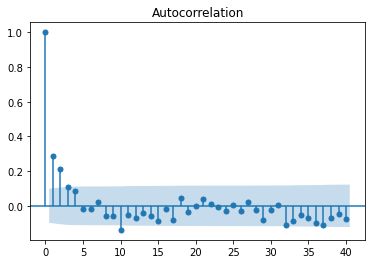

In [28]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05)
acf.show()

C:\Users\Veera Bhadra Chary\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


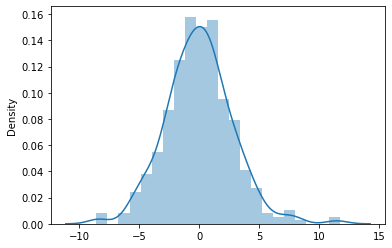

In [29]:
sb.distplot(model.resid)
plt.show()

In [30]:
from scipy import stats
x = model.resid
stats.shapiro(x) # Fitness test

ShapiroResult(statistic=0.9853223562240601, pvalue=0.00046436183038167655)

In [31]:
#We reject null hypotheisi(i.e., residuals are normally distributed) as its p-value is less than 0.05.
(stats.jarque_bera(model.resid))

Jarque_beraResult(statistic=36.775086210902295, pvalue=1.0336928091270181e-08)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [round(variance_inflation_factor(X_constant.values, i),2) for i in range(X_constant.shape[1])]
print(vif)
print(car_en.drop(['mpg','car_name'],axis = 1).columns)

[203.23, 13.05, 30.01, 9.27, 14.77, 2.68, 2.21, 2.24, 2.52, 2.45, 2.48, 2.64, 2.38, 2.64, 2.45, 2.76, 2.6, 2.81, inf, inf, inf, inf, 1.67, 1.12, 1.08, 1.08, 2.32, 1.17, 1.31, inf, 1.99, inf, 2.52, 1.2, inf, inf, inf, inf, 1.4, inf, 1.41, inf, inf, 2.04, 1.67, inf, inf, inf, inf, inf, inf, inf]
Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr_71', 'yr_72', 'yr_73', 'yr_74',
       'yr_75', 'yr_76', 'yr_77', 'yr_78', 'yr_79', 'yr_80', 'yr_81', 'yr_82',
       'origin_2', 'origin_3', 'Company_audi', 'Company_bmw', 'Company_buick',
       'Company_cadillac', 'Company_capri', 'Company_chevroelt',
       'Company_chevrolet', 'Company_chevy', 'Company_chrysler',
       'Company_datsun', 'Company_dodge', 'Company_fiat', 'Company_ford',
       'Company_hi', 'Company_honda', 'Company_maxda', 'Company_mazda',
       'Company_mercedes', 'Company_mercury', 'Company_nissan',
       'Company_oldsmobile', 'Company_opel', 'Company_peugeot',
       'Company_plymouth', 'Company_pontiac', 'Company_renault',
 

C:\Users\Veera Bhadra Chary\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [33]:
name = ['F statistic', 'p-value']
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 2.902064919013657), ('p-value', 2.732079089365949e-11)]

In [34]:
# Here, p value is less than 0.05 so, it is homoscedasticity distribution. 
#H0 = constant variance (Homoscedacity) Ha = Heteroscedacity.
import statsmodels.api as sm
X_constant = sm.add_constant(car_en[['hp','disp','acc','cyl', 'yr_72', 'yr_74',  'yr_78', 'yr_79', 'yr_80',
       'yr_81', 'yr_82', 'origin_2', 'origin_3']])
model = sm.OLS(y,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          6.39e-125
Time:                        14:51:39   Log-Likelihood:                -1063.3
No. Observations:                 398   AIC:                             2155.
Df Residuals:                     384   BIC:                             2210.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.7534      2.132     17.243      0.000      32.562      40.944
hp            -0.0522      0.011     -4.751      0.000      -0.074      -0.031
disp          -0.0246      0.007     -3.419      0.001      -0.039      -0.010
acc           -0.2640      0.089     -2.966      0.003      -0.439      -0.089
cyl           -0.3238      0.349     -0.928      0.354      -1.009       0.362
yr_72         -1.3871      0.726     -1.911      0.057      -2.814       0.040
yr_74         -0.1951      0.745     -0.262      0.793      -1.660       1.269
yr_78          1.8150      0.658      2.757      0.006       0.521       3.109
yr_79          4.3025      0.721      5.969      0.000       2.885       5.720
yr_80          7.4352      0.751      9.897      0.000       5.958       8.912
yr_81          5.3002      0.742      7.144      0.000       3.841       6.759
yr_82          7.0073      0.735      9.537      0.000       5.563       8.452
origin_2       1.9445      0.605      3.215      0.001       0.755       3.134
origin_3       2.9748      0.604      4.926      0.000       1.787       4.162
==============================================================================
Omnibus:                       24.871   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.596
Skew:                           0.290   Prob(JB):                     1.89e-13
Kurtosis:                       4.788   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
import statsmodels.api as sm
X_constant = sm.add_constant(car_en[['hp','cyl', 'yr_72', 'yr_74',  'yr_78', 'yr_79', 'yr_80',
       'yr_81', 'yr_82', 'origin_2', 'origin_3']])
model = sm.OLS(y,np.sqrt(X_constant)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          7.96e-120
Time:                        14:51:39   Log-Likelihood:                -1080.6
No. Observations:                 398   AIC:                             2185.
Df Residuals:                     386   BIC:                             2233.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.1781      1.819     25.933      0.000      43.601      50.755
hp            -0.7452      0.132     -5.666      0.000      -1.004      -0.487
cyl           -8.3932      0.916     -9.160      0.000     -10.195      -6.592
yr_72         -1.5860      0.754     -2.104      0.036      -3.068      -0.104
yr_74          0.0841      0.774      0.109      0.913      -1.437       1.606
yr_78          2.2607      0.679      3.328      0.001       0.925       3.596
yr_79          4.7765      0.745      6.412      0.000       3.312       6.241
yr_80          7.1758      0.785      9.145      0.000       5.633       8.719
yr_81          5.6360      0.771      7.309      0.000       4.120       7.152
yr_82          6.9187      0.766      9.029      0.000       5.412       8.425
origin_2       2.4446      0.597      4.097      0.000       1.271       3.618
origin_3       3.7693      0.581      6.490      0.000       2.627       4.911
==============================================================================
Omnibus:                       19.104   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.101
Skew:                           0.059   Prob(JB):                     8.01e-12
Kurtosis:                       4.751   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
import statsmodels.api as sm
X_constant = sm.add_constant(car_en[['hp','cyl', 'yr_72', 'yr_74',  'yr_78', 'yr_79', 'yr_80',
       'yr_81', 'yr_82', 'origin_2', 'origin_3']])
model = sm.OLS(y,(X_constant)**2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     117.8
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          5.46e-116
Time:                        14:51:39   Log-Likelihood:                -1089.7
No. Observations:                 398   AIC:                             2203.
Df Residuals:                     386   BIC:                             2251.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.5470      0.643     41.274      0.000      25.282      27.812
hp            -0.0002   3.46e-05     -4.578      0.000      -0.000   -9.03e-05
cyl           -0.1343      0.019     -7.113      0.000      -0.171      -0.097
yr_72         -1.4202      0.770     -1.844      0.066      -2.934       0.094
yr_74          0.1353      0.792      0.171      0.864      -1.422       1.692
yr_78          1.9813      0.698      2.838      0.005       0.609       3.354
yr_79          4.5827      0.770      5.953      0.000       3.069       6.096
yr_80          7.7096      0.795      9.700      0.000       6.147       9.272
yr_81          5.7819      0.787      7.346      0.000       4.234       7.329
yr_82          7.2501      0.781      9.287      0.000       5.715       8.785
origin_2       2.8875      0.604      4.780      0.000       1.700       4.075
origin_3       4.0575      0.582      6.967      0.000       2.912       5.203
==============================================================================
Omnibus:                       13.771   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.416
Skew:                           0.325   Prob(JB):                     0.000165
Kurtosis:                       3.792   Cond. No.                     9.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
x = car_en.drop(['mpg','car_name'],axis = 1)
y = car_en['mpg']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 ,random_state = 2)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print('Train Score:',model.score(x_train,y_train))
print('Test Score:',model.score(x_test,y_test))
print('No.of non-zero co-efficients:',np.count_nonzero(model.coef_,0))

Train Score: 0.8661290608843335
Test Score: 0.8446599964864553
No.of non-zero co-efficients: 51


# Regularization 

In [39]:
# Lasso regularizations
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(x_train,y_train)

Lasso()

In [40]:
# Ridge regularizations
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train,y_train)
print('Train Score:',model.score(x_train,y_train))
print('Test Score:',model.score(x_test,y_test))
print('No.of non-zero co-efficients:',np.count_nonzero(model.coef_,0))

Train Score: 0.8612571690841528
Test Score: 0.8558531598672168
No.of non-zero co-efficients: 48


In [41]:
# Elastic regularizations regularizations

from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv = 10 ,
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

cv_model.fit(x_train,y_train)

print('Optimal alpha: ',cv_model.alpha_)
print('Optimal l1_ratio: ',cv_model.l1_ratio_)
print('Number of iterations',cv_model.n_iter_)

Optimal alpha:  0.004479419852367172
Optimal l1_ratio:  1.0
Number of iterations 58


In [42]:
# train model with best parameters from CV
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(x_train, y_train)

print('Train score:',r2_score(y_train, model.predict(x_train))) # Training data performance
print('Test score:',r2_score(y_test, model.predict(x_test))) # Test data performance

Train score: 0.8574101116688033
Test score: 0.8621991131609557


In [46]:
## Comparing performance of all models:
from sklearn.datasets import load_boston
from prettytable import PrettyTable
x = PrettyTable(["Model", "Train Score", "Test Score"])
x.add_row(['Simple LR',0.84,0.85])
x.add_row(['Lasso LR',0.690,0.71])
x.add_row(['Ridge LR',0.84,0.85])
x.add_row(['Elastic LR',0.84,0.85])
print(x)

+------------+-------------+------------+
|   Model    | Train Score | Test Score |
+------------+-------------+------------+
| Simple LR  |     0.84    |    0.85    |
|  Lasso LR  |     0.69    |    0.71    |
|  Ridge LR  |     0.84    |    0.85    |
| Elastic LR |     0.84    |    0.85    |
+------------+-------------+------------+


# The Elastic LR produce the best reglurisation.